<a href="https://colab.research.google.com/github/UAPH451551/PH451_551_Sp23/blob/main/Resources/Keras_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

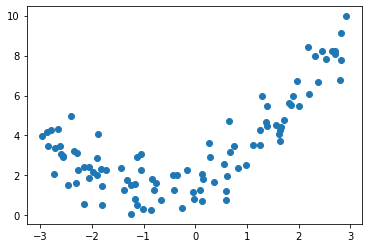

In [ ]:
plt.scatter(X,y)
plt.show()

## SGD Algorithm for Linear Regression:

$y_{pred}=\Theta_0 + \Theta_1x + ... + \Theta_nx^n$ <br>
$Loss = \Sigma_i|y_{true,i}-y_{pred,i}|^2$ <br>
$\Theta_{i,new} = \Theta_{i,old} - ( \partial Loss /\partial\Theta_i )* \eta$ $,\eta =$ learning rate

In [ ]:
def build_linear_regressor(degree):
  inputs = keras.Input(shape=(1,))
  list_of_thetas = []
  for i in range(degree + 1):
    theta = keras.layers.Dense(1, activation='linear', use_bias=False)(inputs**i)
    list_of_thetas.append(theta)
  add = keras.layers.Add()([a for a in list_of_thetas])

  model = keras.Model(inputs=inputs, outputs=add)
  return model

In [ ]:
model = build_linear_regressor(degree=2)

In [ ]:
model.compile(optimizer='sgd', loss='mse')

In [ ]:
model.fit(X, y, epochs=50, verbose=0, batch_size=1, shuffle=False)

In [ ]:
predictions = model.predict(X)

4/4 [==============================] - 0s 3ms/step


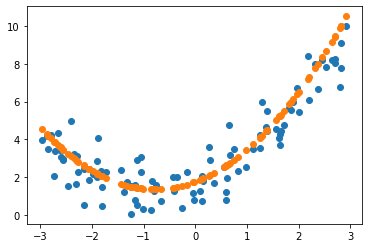

In [ ]:
plt.scatter(X, y)
plt.scatter(X, predictions)
plt.show()

In [ ]:
model = build_linear_regressor(degree=5)

You can also customize optimizers by creating and passing an [optimizer](https://keras.io/api/optimizers/) object.

Same for loss functions, activation functions, etc.

In [ ]:
optim = keras.optimizers.SGD(learning_rate=1e-5, momentum=0.0, nesterov=False,
                             amsgrad=False, weight_decay=False) #etc


In [ ]:
model.compile(optimizer=optim, loss='mse')

In [ ]:
model.fit(X, y, epochs=10, verbose=1, batch_size=1, shuffle=False)

Epoch 1/10
100/100 [==============================] - 1s 2ms/step - loss: 830.6516
Epoch 2/10
100/100 [==============================] - 0s 2ms/step - loss: 27.2790
Epoch 3/10
100/100 [==============================] - 0s 2ms/step - loss: 5.6241
Epoch 4/10
100/100 [==============================] - 0s 2ms/step - loss: 4.8395
Epoch 5/10
100/100 [==============================] - 0s 2ms/step - loss: 4.7485
Epoch 6/10
100/100 [==============================] - 0s 2ms/step - loss: 4.6979
Epoch 7/10
100/100 [==============================] - 0s 2ms/step - loss: 4.6526
Epoch 8/10
100/100 [==============================] - 0s 2ms/step - loss: 4.6089
Epoch 9/10
100/100 [==============================] - 0s 2ms/step - loss: 4.5661
Epoch 10/10
100/100 [==============================] - 0s 2ms/step - loss: 4.5243


In [ ]:
predictions = model.predict(X)

4/4 [==============================] - 0s 3ms/step


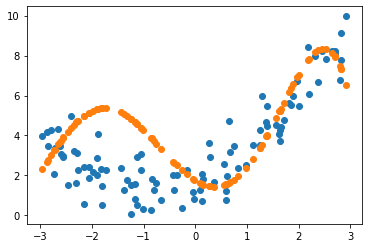

In [ ]:
plt.scatter(X, y)
plt.scatter(X, predictions)
plt.show()

## Let's now compare SGD for linear regression to SGD for Neural Nets:

### SGD Algorithm for Linear Regression:

$y_{pred}=\Theta_0 + \Theta_1x_1 + ... + \Theta_nx_n$ <br>
$Loss = \Sigma_i|y_{true,i}-y_{pred,i}|^2$ <br>
$\Theta_{i,new} = \Theta_{i,old} - ( \partial Loss /\partial\Theta_i )* \eta$ $,\eta =$ learning rate

## SGD Optimizer for Linear Models with Mean Square Error Loss Function:

Consider just the neuron activation for the first neuron in the last layer. <br>
This neuron is essentially what our model prediction is for the first output $y_0$.

$a_{0,l} = \sigma[w_{0,l}(a_{0,l-1} + a_{1,l-1} + ... a_{m,l-1})+ b_l]$ <br>
a are activations of neurons, b are layer biases, w are neuron weights, $\sigma$ <br>
is some sort of activation function <br>

Consider now how we can evaluate this loss using MSE: <br>
$Loss_{0,l} = |y_{true,0}-a_{0,l}|^2$ <br>

We can update our weights just like we updated our $\Theta$ values in linear reg. <br>
$w_{0,l,new} = w_{0,l,old} - ( \partial Loss /\partial w_{0,l} )* \eta$ $,\eta =$ learning rate <br>

Same for biases. <br>
$b_{l,new} = b_{l,old} - ( \partial Loss /\partial b_l )* \eta$

We then repeat this procedure going from the end of the model backward to the <br>
start of the model updating all of the neuron weights and layer biases. Note <br>
that the neurons in the second-to-last layer would need to have their losses <br>
partial derivatives summed over all activations in the final layer since <br> they're connected to all of the final layer neurons.

It turns out that this process is totally general and can be used for many loss <br>
functions and activation functions. Most other optimizer algorithms are just <br>
improvements aimed at smoothing the behavior of SGD.

In [ ]:
# Sequential classifier for 10 1D inputs and 1 binary class
sequential_model1 = keras.Sequential()
sequential_model1.add(keras.layers.Dense(10, activation='relu'))
sequential_model1.add(keras.layers.Dense(1, activation='sigmoid'))

sequential_model1.compile(optimizer='sgd', loss='binary_crossentropy')

In [ ]:
# Sequential classifier for 10x10 2D inputs and 1 binary class
sequential_model2 = keras.Sequential()
sequential_model2.add(keras.layers.Flatten(input_shape=(10,10)))
sequential_model2.add(keras.layers.Dense(10*10, activation='relu'))
sequential_model2.add(keras.layers.Dense(1, activation='sigmoid'))

sequential_model2.compile(optimizer='sgd', loss='binary_crossentropy')

In [ ]:
# Sequential classifier for 20x30 1D inputs and 10 unique classes
sequential_model3 = keras.Sequential()
sequential_model3.add(keras.layers.Flatten(input_shape=(20,30)))
sequential_model3.add(keras.layers.Dense(20*30, activation='relu'))
sequential_model3.add(keras.layers.Dense(10, activation='softmax'))

sequential_model3.compile(optimizer='sgd', loss='sparse_categorical_crossentropy')

In [ ]:
# Sequential regressor for 20 1D inputs and 3 outputs
sequential_model4 = keras.Sequential()
sequential_model4.add(keras.layers.Dense(20, activation='relu'))
sequential_model4.add(keras.layers.Dense(3, activation='linear'))

sequential_model4.compile(optimizer='sgd', loss='mse')